# Linear Regression

* y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다. 한 개의 설명 변수에 기반한 경우에는 단순 선형 회귀, 둘 이상의 설명 변수에 기반한 경우에는 다중 선형 회귀라고 한다. [참고: 위키피디아](https://ko.wikipedia.org/wiki/선형_회귀)

$$y_{\textrm{pred}} = \boldsymbol{W}^{\top}\boldsymbol{x} + b$$

* $\boldsymbol{x} = [x_{1}, x_{2}, \cdots, x_{d}]$
* $\boldsymbol{W} = [w_{1}, w_{2}, \cdots, w_{d}]$
* Loss function: $\mathcal{L} = \sum^{N} (y_{\textrm{pred}} - y)^{2}$

## Training Pseudo Code

```python
for epoch in max_epochs: # 1 epoch: 모든 데이터(N)를 한번 학습 시켰을 때
  for step in num_batches: # num_batches = int(data_size / batch_size)
    1. sampling mini-batches with batch_size
      1-1. data augmentation (필요하면)
    2. calculate loss
    3. calculate loss using logits and labels
    3. calculate the gradient with respect to weights
    4. update weights
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

sess_config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))

tf.set_random_seed(219)
np.random.seed(219)

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Users\user\Anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.23) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
_a = 3
_b = -3
N = 200
data_X = np.random.uniform(low=0, high=5, size=N) #uniform 분포 : 균등 분포
data_y = _a * data_X + _b + np.random.normal(0, 2, N)

In [11]:
len(data_X)

200

In [3]:
np.random.shuffle()

array([34, 93, 91, 37, 40, 67, 69, 75, 76, 57, 61, 70, 94, 70, 90, 31, 90,
       41, 14, 45, 70, 11, 81, 57, 52, 46, 72, 27, 87, 39, 96, 66, 60,  2,
       70, 77,  9, 76, 92, 95, 37,  9, 29, 27, 35,  7, 19, 73, 78, 56, 62,
       22, 25,  1, 57,  7, 21, 63, 82, 30, 13, 23,  5, 59, 51, 54, 34, 58,
       35, 32, 17, 83,  4, 32, 54, 42, 25, 25, 51, 42, 28, 32, 42, 69, 83,
       15,  1, 54, 61,  1, 11, 35, 28, 38, 28, 32, 86,  5, 69, 77])

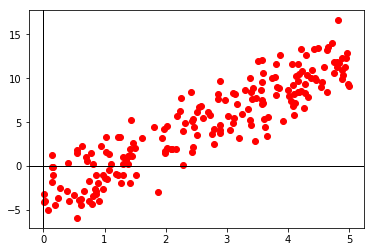

In [4]:
plt.plot(data_X, data_y, 'ro')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.show()

### Create placeholders for inputs and labels

In [5]:
# 여기를 직접 채워넣으시면 됩니다.
# X: inputs
x = tf.placeholder(name='x', dtype= tf.float32, shape=[])

# y: labels
y = tf.placeholder(name='y', dtype=tf.float32, shape=[])

### Create weight and bias

In [6]:
# create Variables
W = tf.get_variable(name='W', initializer=tf.constant(.0))
b = tf.get_variable(name='b', initializer=tf.constant(.0))

#### Build a model: $y = Wx + b$

In [7]:
with tf.variable_scope(name_or_scope='y_pred'):
    y_pred = x * W + b

In [ ]:
### Define loss function

In [ ]:
lo1 = tf.square(y-y_pred)
lo2 = np.square(y-y_pred)
lo3 = (y-y_pred)**2

In [ ]:
print(lo1)
print(lo2)
print(lo3)

In [8]:
loss = tf.reduce_mean(np.square(y-y_pred))

In [ ]:
### Create a optimizer

In [9]:
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [ ]:
## Phase 2. Train a model

In [ ]:
### Train a model

In [13]:
with tf.Session(config=sess_config) as sess:
  # Initialize all variables
  sess.run(tf.global_variables_initializer())
  
  writer = tf.summary.FileWriter('graphs/01_linear_reg', sess.graph)
  writer.close()
  
  # train the model
  max_epochs = 100
  total_losses = []
  for epoch in range(max_epochs+1):
    total_loss = 0.0

    # 모든 데이터를 random하게 섞는다.
    shuffle_index = np.random.permutation(len(data_X))
    
    for i in shuffle_index:
      x_ = data_X[i]
      y_ = data_y[i]
      # `sess.run` 부분을 직접 채워넣으시면 됩니다.
      _, loss_ = sess.run(fetches = [train_op, loss], feed_dict = {x:x_,y:y_})
      total_loss += loss_
      
    total_loss /= len(data_X)
    total_losses.append(total_loss)
    
    if epoch % 10 == 0:
      print('Epoch %d: total_loss: %f' % (epoch, total_loss))
      
  print('training done!')
      
  W_, b_ = sess.run([W, b])

Epoch 0: total_loss: 13.293877
train_ops :  None
Epoch 10: total_loss: 5.115731
train_ops :  None
Epoch 20: total_loss: 4.626248
train_ops :  None
Epoch 30: total_loss: 4.555735
train_ops :  None
Epoch 40: total_loss: 4.483544
train_ops :  None
Epoch 50: total_loss: 4.536646
train_ops :  None
Epoch 60: total_loss: 4.519947
train_ops :  None
Epoch 70: total_loss: 4.526045
train_ops :  None
Epoch 80: total_loss: 4.540533
train_ops :  None
Epoch 90: total_loss: 4.519049
train_ops :  None
Epoch 100: total_loss: 4.529721
train_ops :  None
training done!
